<a href="https://colab.research.google.com/github/ellaclauz/Hypothesis-testing/blob/main/tips_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sn
from scipy import stats
import numpy as np

In [2]:
Tips = sn.load_dataset("tips")
Tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
Tips.shape

(244, 7)

In [4]:
Tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
Tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [6]:
friday = Tips[Tips["day"] == "Fri"]
friday

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
99,12.46,1.50,Male,No,Fri,Dinner,2


In [7]:
sunday = Tips[Tips["day"] == "Sun"]
sunday

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [8]:
#getting unique days
Tips["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [9]:
Tips["day"].nunique()

4

In [10]:
#counting for each unique day
Tips["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [11]:
Tips["time"].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [12]:
observed_diff = abs(friday["tip"].mean() - sunday["tip"].mean())

In [13]:
observed_diff

0.520394736842106

In [14]:
sig_level = 0.05

In [15]:
test_results = stats.ttest_ind(a = friday["tip"], b = sunday["tip"], equal_var = False)
test_results

Ttest_indResult(statistic=-1.9030396818363204, pvalue=0.06590541897530193)

In [16]:
p_value = test_results.pvalue

p_value

0.06590541897530193

In [17]:
if p_value < sig_level:
    print(observed_diff, p_value, "Reject")
else:
    print(observed_diff, p_value, "Fail to reject")

0.520394736842106 0.06590541897530193 Fail to reject


In [18]:
Tips.shape

(244, 7)

In [19]:
saturday = Tips[Tips["day"] == "Sat"]
saturday

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [20]:
saturday.shape

(87, 7)

In [21]:
sunday.shape

(76, 7)

In [22]:
import matplotlib.pyplot as plt

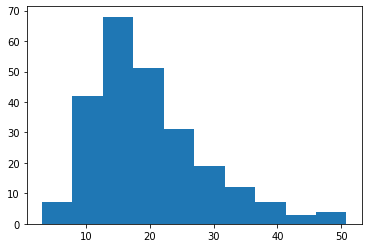

In [23]:
#plot distribution for total bill amount
plt.hist(Tips["total_bill"])
plt.show()

The total bill for this dataset ranges roughly between $4-$51 and it is skewed to the right. The average value for the total bill amount is about $15

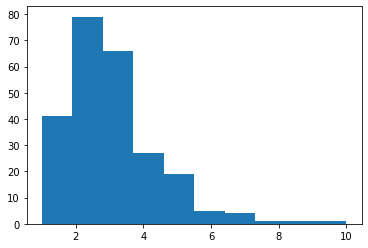

In [24]:
#plot distribution for tip amount
plt.hist(Tips["tip"])
plt.show()

This virtualization is rightly skewed and most of the people here are tipping a flat amount based on their budget and it's not dependent on the total bill

In [25]:
#what is the exact value for the total bill( manually computing total bill mean)

sum(Tips["total_bill"]) / len(Tips["total_bill"])

19.785942622950824

In [26]:
#using the mean function from numpy to compute total bill

np.mean(Tips["total_bill"])

19.78594262295082

In [27]:
#use chaining function to compute total bill

Tips["total_bill"].mean()

19.78594262295082

In [28]:
#standard deviation for total bill

np.std(Tips["total_bill"], ddof=1)

8.902411954856856

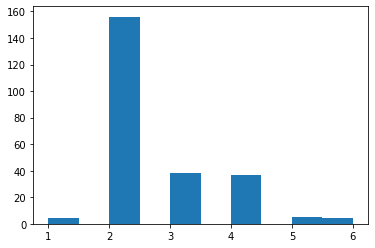

In [29]:
plt.hist(Tips["size"])
plt.show() 

It looks like a party of 2 is more frequent for party size followed by 3 and 4. 1 and 6 have ties in terms of the least frequent party size.

In [30]:
#using the mean function from numpy to compute tip

np.mean(Tips["tip"])

2.99827868852459

In [31]:
#standard deviation for tip

np.std(Tips["tip"], ddof=1)

1.3836381890011822

In [32]:
Tips["size"].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

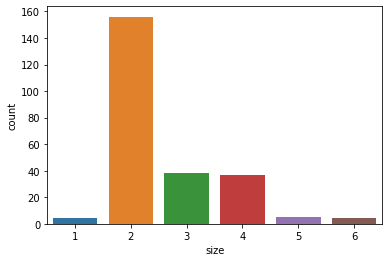

In [33]:
# plot value counts for size

sn.countplot(data=Tips, x="size")
plt.show()